In [ ]:
import pandas as pd
#Загружаем необходимые файлы с данными
daily_dataset = pd.read_csv('daily_dataset.csv')
informations_households = pd.read_csv('informations_households.csv')
acorn_details = pd.read_csv('acorn_details.csv',encoding = "ISO-8859-1")

#Из таблицы данных о домах добавляем в таблицу суточного потребления столбцы 'block' и 'Acorn'
informations_households_pivot_file = informations_households.set_index('LCLid')['file']
informations_households_pivot_Acorn = informations_households.set_index('LCLid')['Acorn']
#с помощью метода map
daily_dataset['block'] = daily_dataset['LCLid'].map(informations_households_pivot_file)
daily_dataset['Acorn'] = daily_dataset['LCLid'].map(informations_households_pivot_Acorn)

#Транспонируем таблицу Acorn. В неё позже добавим строки с датами и 
#коэффициентами корреляции для каждого показателя из группы потребителей
acorn_details_transpose = acorn_details.transpose()
# создали шапку результирующей таблицы
Corr_Acorn_Dates = acorn_details_transpose[0:3]

#Создаем список дат
dates = pd.date_range('2012-01-01','2014-02-28').strftime( '%Y-%m-%d' )

#В цикле перебираем даты Работа данного цикла заняла 12 часов.
for date in dates:
    # Вычисляем среднее потребление по дому и по группе потребителей
    Sourse_daily_dataset_i = daily_dataset[(daily_dataset['day']==date)].groupby(['block','Acorn']).mean().reset_index()
    # В цикле перебираем показатели и вычисляем корреляцию со средним энергопотребление дома и группы потребителй
    for i in range(0,len(Corr_Acorn_Dates.columns)):
        Sourse_daily_dataset_i['data'] = Sourse_daily_dataset_i['Acorn'].map(acorn_details_transpose[i]['ACORN-A':'ACORN-Q'])
        Sourse_daily_dataset_i = Sourse_daily_dataset_i.dropna()
        Sourse_daily_dataset_i['data'] = pd.to_numeric(Sourse_daily_dataset_i['data'])
        corr = Sourse_daily_dataset_i.energy_sum.corr(Sourse_daily_dataset_i.data)
        Corr_Acorn_Dates.loc[date,i] = abs(corr)
    print(date)# Контроль процесса - вывод дат
Corr_Acorn_Dates.head()
Corr_Acorn_Dates.to_csv('Corr_Acorn_Dates.csv')#сохроняемм результат

In [1]:
import pandas as pd
Corr_Acorn_Dates = pd.read_csv('Corr_Acorn_Dates.csv',index_col=0)
Corr_Acorn_Dates.head()

,0,1,2,3,4,5,6,7,8,9,...,816,817,818,819,820,821,822,823,824,825
MAIN CATEGORIES,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,POPULATION,...,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME,LEISURE TIME
CATEGORIES,Age,Age,Age,Age,Age,Age,Age,Age,Geography,Geography,...,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type,Holiday Destination/Type
REFERENCE,Age 0-4,Age 5-17,Age 18-24,Age 25-34,Age 35-49,Age 50-64,Aged 65-74,Aged 75 plus,England,Northern Ireland,...,Europe (other),USA / Canada,Caribbean,Australia / New Zealand,Africa,Asia,Activity / Outdoor Sports,Cruise,Package,Self-catering
2012-01-01,0.21108551059966768,0.10533397132594068,0.05621827017845919,0.04632342268774308,0.010492717700784497,0.04749770803636759,0.11450082547885383,0.19902541814120503,0.04908300112041156,0.10924845347188644,...,0.21340751055684662,0.1851467513071642,0.11125943892205906,0.19186757645389838,0.20897912305790517,0.1259593652720731,0.2057948967454659,0.14294587278314463,0.14004189874432346,0.09470079906011773
2012-01-02,0.2100826577074372,0.1663644116870905,0.05982095074443106,0.017794373442192132,0.02038369671509025,0.04221434674235512,0.11335114583230801,0.19762603959961772,0.020083297348513142,0.075885471863523,...,0.15467739387749313,0.09196293678264807,0.10509375712288771,0.09723458931617926,0.11771922963463304,0.1221784084933375,0.14553234421331573,0.04412206597343012,0.06932012328709328,0.036519487458138156


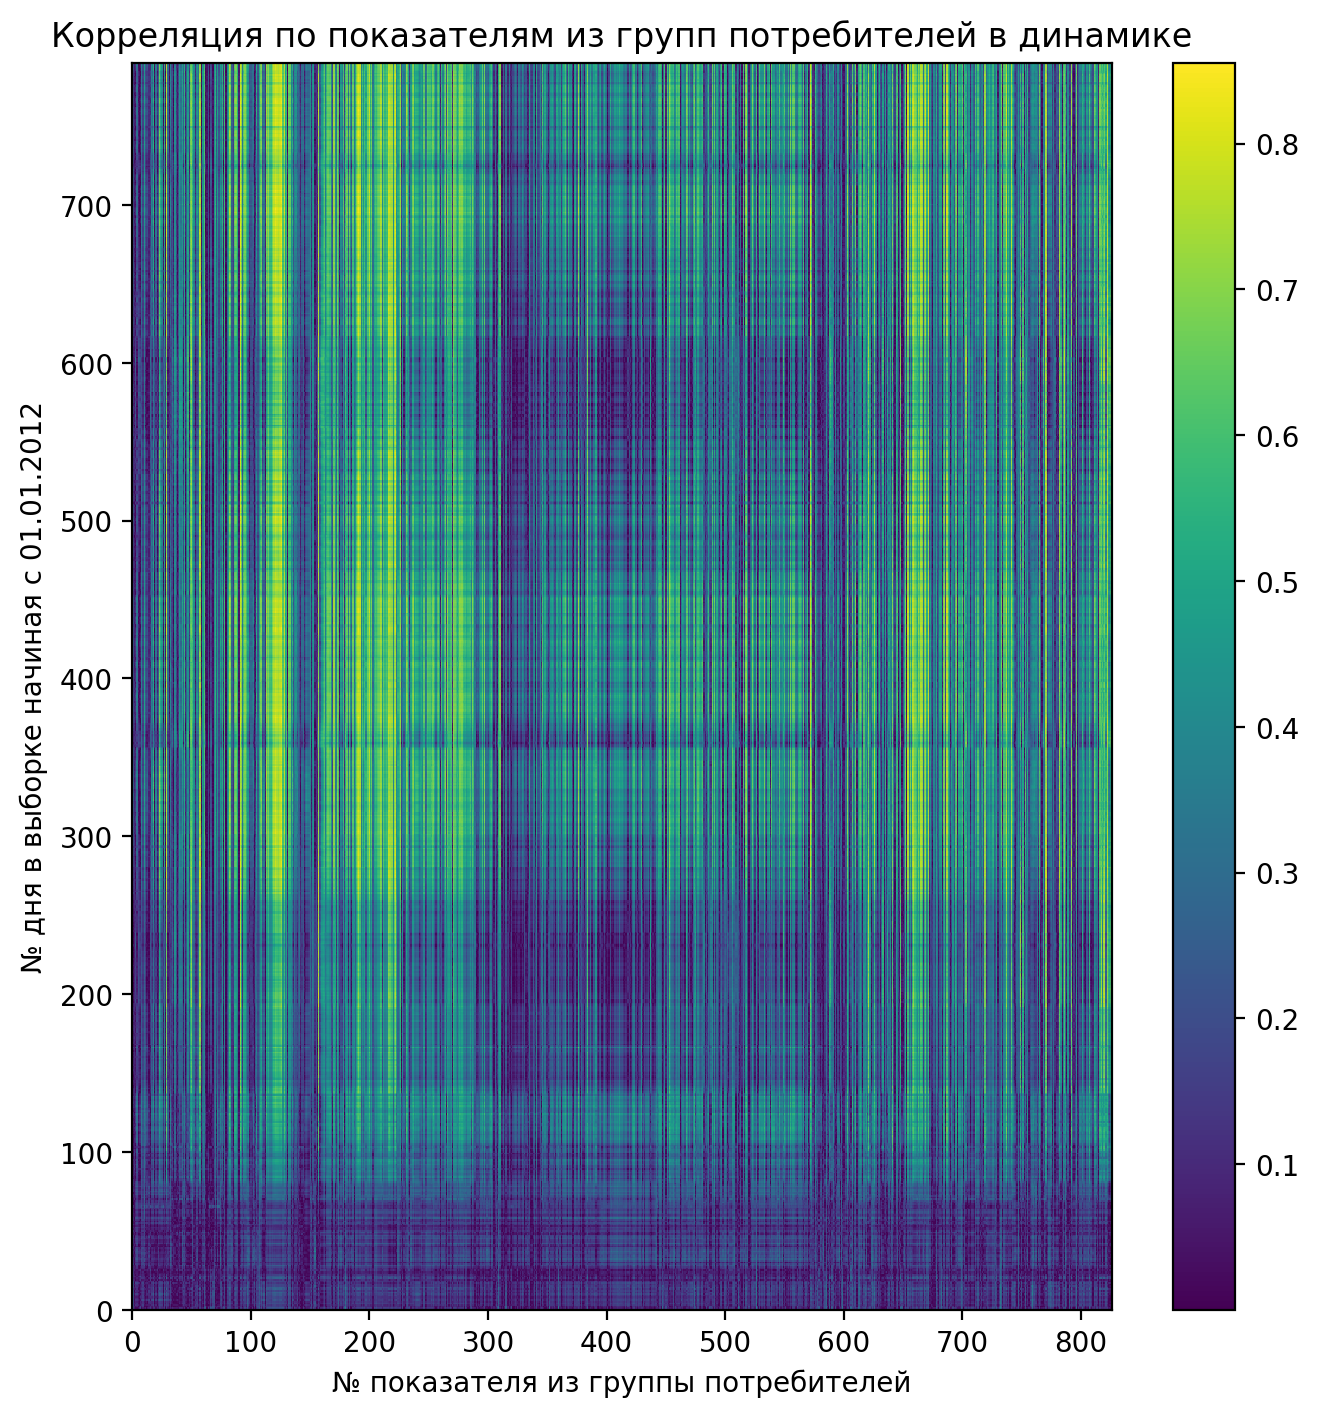

In [3]:
import matplotlib.pyplot as plt
import numpy as np
# Постройка графика: По y номера дней от 01.01.2012 по 28.02.2014
# по х номера показателй из групп потребителй
fig = plt.figure(figsize = [len(Corr_Acorn_Dates['2012-01-01':'2014-02-28'])/200*2,len(Corr_Acorn_Dates.columns)/200*2],dpi = 200)
pc = plt.pcolor(np.array(Corr_Acorn_Dates['2012-01-01':'2014-02-28'].astype(np.float))) # метод псевдографики pcolor
plt.colorbar(pc)
plt.title('Корреляция по показателям из групп потребителей в динамике')
plt.xlabel('№ показателя из группы потребителей')
plt.ylabel('№ дня в выборке начиная с 01.01.2012')
plt.savefig(fname='Corr', fmt='png')

plt.show()

In [6]:
#Вывод показателей с самым большим коэффициентом корреляции
Temp = Corr_Acorn_Dates['2012-01-01':'2014-02-28'].astype(np.float).max()
Corr_Acorn_Dates[0:3][list(Temp.sort_values(ascending=False)[0:10].reset_index()['index'])]

,126,191,121,91,222,654,125,822,737,122
MAIN CATEGORIES,EDUCATION,FINANCE,EDUCATION,ECONOMY,FINANCE,SHOPPING,EDUCATION,LEISURE TIME,LEISURE TIME,EDUCATION
CATEGORIES,Scotland: Pupils in the S5 cohort,Household Annual Income,England: Pupils at the end of KS2,Social Grade,Savings and Investments,Preferred Supermarket,Scotland: Pupils in the S5 cohort,Holiday Destination/Type,Daily Newspapers,England: Pupils at the end of KS4
REFERENCE,Attained 5 awards at SCQF level 6 and above,"£100,000+","Achieving expected level in reading, writing a...",A,"Value of investments £25,000+",M & S,Attained 3 awards at SCQF level 6 and above,Activity / Outdoor Sports,The Times,Achieving 5+ A*-C at GCSE or equivalent


In [8]:
#Значения коэффициентов для вышеприведенных показателей
Corr_Acorn_Dates[0:3][list(Temp.sort_values(ascending=False)[0:10].reset_index()['index'])]
Temp.sort_values(ascending=False)[0:10]

126    0.855479
191    0.848770
121    0.847711
91     0.847226
222    0.838083
654    0.829068
125    0.826946
822    0.825405
737    0.821981
122    0.821565
dtype: float64